In [2]:
### ECOUTER VIDEO

# Pattern Recognition 2 - Feature Space

**Objectives**

* Compute distances between objects in feature space
* Use PCA to perform reduce the dimensionality of the problem
* Implement face recognition using [Eigenfaces](http://en.wikipedia.org/wiki/Eigenface)

## Feature space distance (distance-based OCR)

The `ocr_features.npy` file contains extracted features for each letter from the document used in the previous lab, and the `ocr_class.npy` file contains the character corresponding to these features.

The i-th row of ocr_features holds 18 shape descriptors (numerical)

The i-th entry of ocr_class is the ground truth character label for that row

The 18 features, extracted with the `regionprops` methods from `scikit-image` are, in order: 

> area, convex area, eccentricity, equivalent diameter, extent, filled area, intertia tensor eigenvalue 1, inertia tensor eigenvalue 2, major axis length, minor axis length, Hu moment 1, Hu moment 2, Hu moment 3, Hu moment 4, Hu moment 5, Hu moment 6, perimeter, solidity

* Create a method which computes the Euclidian distance, in feature space, between two objects.
* Check if the "nearest" object is of the same class.
* What can you do to improve this "distance-based" classification? 

In [14]:
import numpy as np

ocr_features = np.load('ocr_features.npy')

ocr_class = np.load('ocr_class.npy')

print(ocr_features.shape)
print(ocr_features[0,])
print(ocr_class[0,])
print(ocr_class.shape)
print(ocr_class)
print(np.unique(ocr_class))


(2392, 18)
[ 3.10000000e+01  3.50000000e+01  9.54932959e-01  6.28254931e+00
  7.75000000e-01  3.10000000e+01  8.62607291e+00  7.59983279e-01
  1.17480708e+01  3.48708079e+00  3.02776006e-01  6.43864372e-02
  2.70125381e-04  2.51759195e-05 -1.78365931e-09 -4.23320756e-06
  2.32071068e+01  8.85714286e-01]
i
(2392,)
['i' 'u' 'i' ... 'u' 'a' 's']
['0' '1' '4' '5' 'A' 'B' 'C' 'D' 'F' 'G' 'I' 'L' 'M' 'N' 'O' 'R' 'S' 'T'
 'W' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


IDEE : les mêmes caractères (lettres) devrient se regrouper ensemble dans le feature space et comme ça on peut les distinguer.

-Test if similar letters (based on features) are closest in feature space using Euclidean distance.

In [13]:
import numpy as np

# Function to calculate Euclidean distance. ## A and B are vector of features et donc différence d'élement par élément
def euclidian(A, B):
    return np.sqrt(((A - B) ** 2).sum())

# Brute-force nearest neighbor search (loop version)
best_matches = []
for i in range(ocr_features.shape[0]):
    best_match = -1
    best_d = 100000000
    for j in range(ocr_features.shape[0]):
        if i == j:
            continue
        d = euclidian(ocr_features[i], ocr_features[j])
        if d < best_d:
            best_match = j
            best_d = d
    best_matches.append((i, ocr_class[i], best_match, ocr_class[best_match], best_d))

# Accuracy calculation
best_matches = np.array(best_matches)
print(best_matches[0,])
acc = (best_matches[:, 1] == best_matches[:, 3]).sum() / best_matches.shape[0]
print(acc) # good result 

['0' 'i' '1377' 'i' '0.0']
0.899247491638796


In [6]:
## Confond u et n, parce que par exemple roation invariant avec Hu donc logique que ça confond. a et e aussi p/e ou l et 1, ... donc logique les erreurs de l'algo.
for matches in best_matches:
    if matches[1] != matches[3]:
        print(matches[1], matches[3])

u n
h w
l 1
a e
F h
L T
l 1
e c
y f
t i
v a
a e
a s
W N
r s
b d
d b
n u
u n
b d
u n
v a
b d
1 l
n u
a s
r i
p d
c e
A w
b d
l 1
n u
b d
u n
R m
a v
u n
M N
L T
l 1
d p
a e
F S
a 4
b d
e c
0 d
5 y
n u
c a
d b
n u
T F
S F
b d
p d
u n
r t
F S
b d
F L
d b
S F
g F
c e
5 c
S F
1 l
n u
b d
u n
u n
n u
o n
h w
a e
p d
d b
v a
4 a
e c
S F
t i
5 e
l 1
b d
I f
a e
u n
f e
d b
r t
p q
d b
T S
d b
F S
e c
s e
n u
n u
k h
F S
e a
1 l
e c
h b
a s
n u
u n
l 1
S F
n u
n u
S F
k 5
n u
k h
n u
n u
n u
I f
e c
a e
a e
n u
t r
x a
a e
1 l
T L
u n
S F
F g
1 l
u n
u n
n u
L F
u n
b h
n u
n u
d p
1 l
d b
n u
T F
t i
n u
a s
d b
n u
n o
F S
u n
u n
1 l
u n
A S
5 h
b d
d p
n u
b d
e 5
n u
e s
v r
c e
s c
p q
e c
1 l
x u
y 5
n u
u n
u n
d b
t i
a s
u n
b d
l 1
h b
S F
n u
e s
t o
e n
n u
u e
p d
o t
e a
e a
t 5
f t
m S
d b
x z
k F
u n
b h
e s
a c
u e
n u
1 l
1 l
n u
e c
d b
u n
n u
q p
n u
u n
F g
f I
p d
b d
a e
D O
d b
d h
d p
n u
F S
x c
4 a
b d
a e
t i
a e
s a
a e
e f
u n


### Features with large numeric ranges will dominate Euclidean distance ! not the same scale, so we need to normalise with a mean of 0 and sd of 1

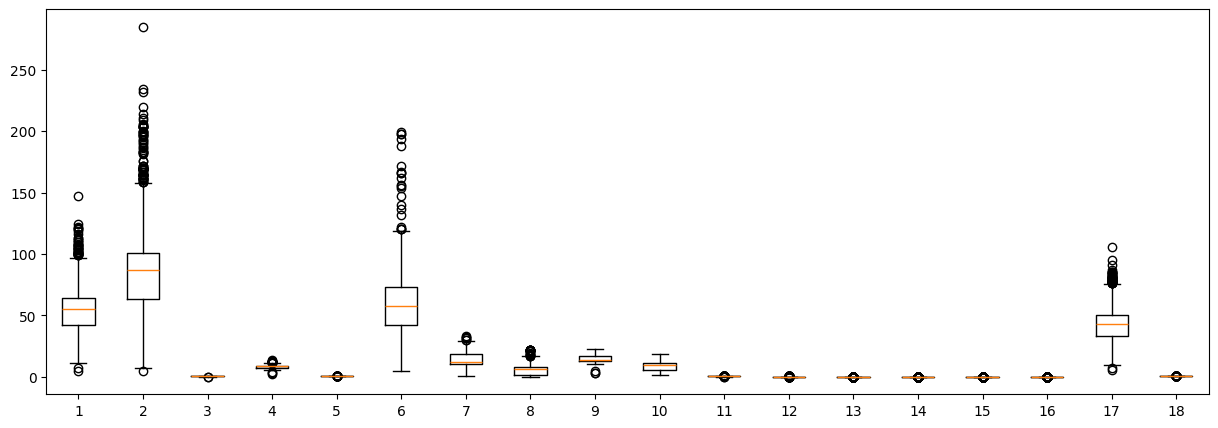

In [7]:
# Quel est le problème le plus gros qu'on a en utilisant cette méthode, que pourrions nous faire pour améliorer ça ?

#Les features ne sont pas standardisés càd que certaines features contribuent bcp trop par rapport à d'autre, comme montré dans le boxplot en bas 
#certaines vont de 0 à 1 et d'autres à 100, donc les 100 ont bcp plus de poids. il faut normaliser.

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.boxplot(ocr_features)
plt.show()


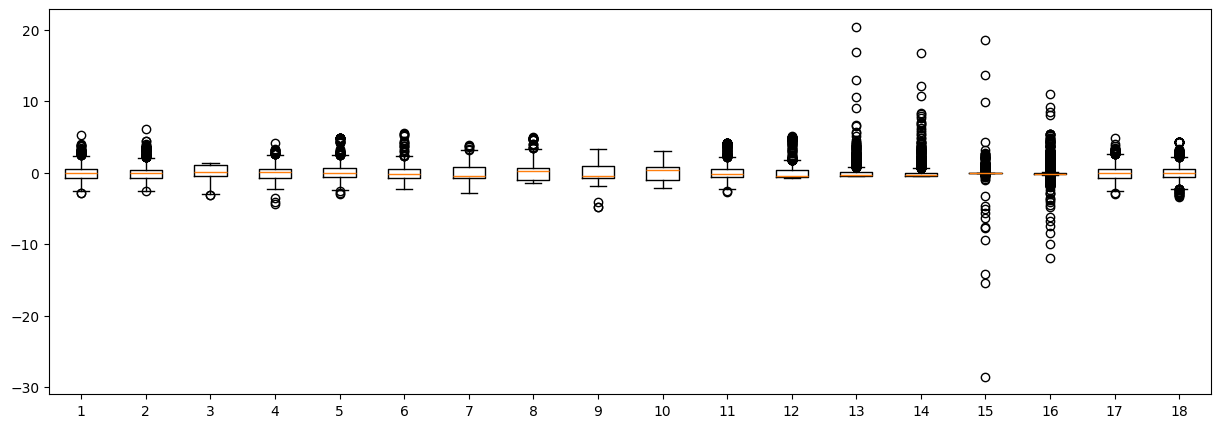

In [9]:
ocr_features = (ocr_features - ocr_features.mean(axis=0)) / ocr_features.std(axis=0)
plt.figure(figsize=(15, 5))
plt.boxplot(ocr_features)
plt.show()

In [11]:
# Optimized vectorized version (même code mais plus rapide, ce qui change c'est les ocr features, la standardization)
best_matches = []
for i in range(ocr_features.shape[0]):
    distances = np.sqrt(((ocr_features - ocr_features[i]) ** 2).sum(axis=1))
    distances[i] = distances.max()  # To ignore self-distance
    best_match = distances.argmin()
    best_matches.append((i, ocr_class[i], best_match, ocr_class[best_match], distances.min()))


# Accuracy calculation
best_matches = np.array(best_matches)
acc = (best_matches[:, 1] == best_matches[:, 3]).sum() / best_matches.shape[0]
print(acc) # good result 

0.9544314381270903


In [13]:
# DONC BIEN REGARDER TYPE, range of the data, ... et voir si on peut faire ensuite du prceossing pour améliorer.

#Bon machine learning est bcp plus robuste, on a pas fait de testing, ... donc bien faire attention, icic c'est juste pour montrer une méthode inutuive.
#avec idée d'extraire infos meaningful.

In [14]:
for matches in best_matches:
    if matches[1] != matches[3]:
        print(matches[1], matches[3])

u n
h b
l 1
u n
t i
d b
a e
a e
W R
d b
n u
u n
b d
u n
b d
1 l
b d
u n
I l
d b
R m
u n
n u
M W
a e
0 R
d b
p d
u n
a e
u n
d b
n u
t i
5 f
1 l
n u
u n
n u
p h
t i
5 e
l 1
I f
u n
n u
k h
n u
a s
u n
n u
k d
k h
d b
n u
I l
u n
i t
a e
a e
u n
u n
u n
L f
b h
n u
n u
1 l
n u
a e
n u
u n
1 l
d h
e t
d b
I 1
u n
u n
u n
u n
b d
b d
u n
t o
p d
o t
t e
f t
b h
u n
1 l
n u
u n
q d
F h
p d
b d
a e
D O
d b
a v
b d
u n
a e
a v
s a
a e
e f


In [15]:
#Mistake principale mtn c'est rotation invariant.

## Eigenfaces

The `faces.npy` file contains a 3D matrix containing 2963 images, each with 170x200 pixels, encoded in 8-bit grayscale.

##### NB INTRO A 23min bien revoir vidéo
use the feature space and use it to find the d'où prvient la variation dans le jeu de données.

In [15]:
from matplotlib import pyplot as plt
%matplotlib notebook

faces = np.load('faces.npy')
print(faces.shape, faces.dtype, faces.min(), faces.max())

# Puis le réenregistrer proprement (format Python 3)
np.save("faces_clean.npy", faces)

(2963, 200, 170) uint8 0 255


C:\Users\Arthur\AppData\Local\Temp\ipykernel_30480\61985573.py:4: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  faces = np.load('faces.npy')


In [16]:
faces = np.load("faces_clean.npy")

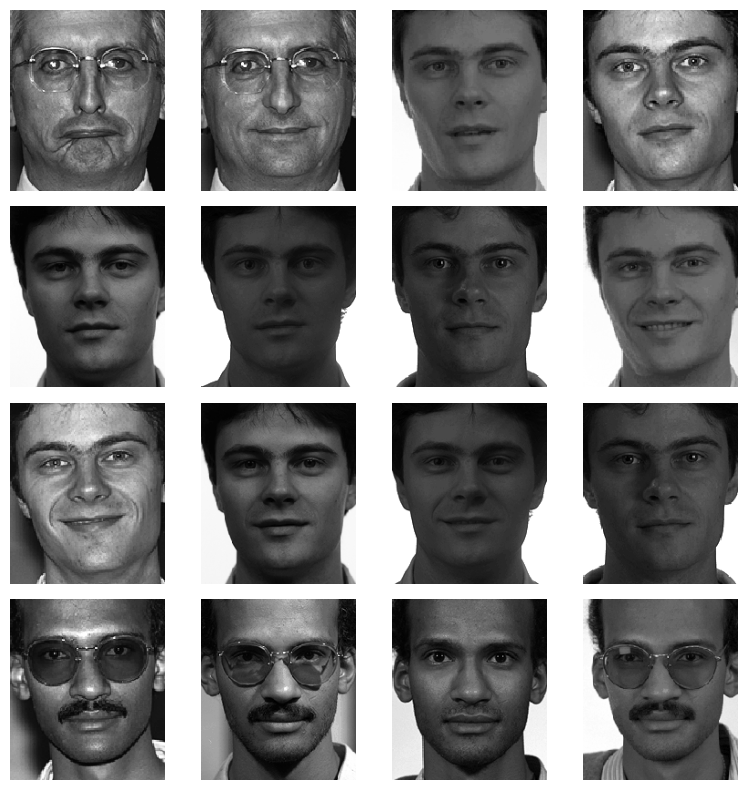

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Affiche quelques visages
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(faces[i], cmap=plt.cm.gray)
    plt.axis('off')
plt.tight_layout()
plt.show()


### Direct approach (Use PCA to perform reduce the dimensionality of the problem)

1. Write a program that subsample the images (e.g. by 5) to reduce computational time, converts 2D images into lines, and collect all these lines into one single matrix **T**.  
   → Each image is flattened into a row of **T**. Subsampling helps speed up processing and reduce data size.

2. Zero-center **T** by removing the "mean image" ($T_i \leftarrow T_i - T_{mean}$)  
   → This centers the data around zero, which is necessary for PCA

3. Compute the variance/covariance matrix of **T**:  
   $$ \mathbf{S} = \mathbf{T^T T} $$  
   → This measures how pixel values vary together across images (i.e. the structure of variation).

4. Compute the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$ of **S**  
   $$ \mathbf{S v}_i = \mathbf{T^T}\mathbf{T v}_i = \lambda_i \mathbf{v}_i $$  
    - Eigenvectors $\mathbf{v}_i$ represent the directions of maximum variance — these are the **Eigenfaces**.
    - Eigenvalues $\lambda_i$ indicate how much variance is explained by each direction.
    - The larger $\lambda_i$, the more important the corresponding eigenface is for reconstructing variation across face images.

5. The eigenvectors have the same size as the images, and are often referred to as "eigenfaces". Display some of them.  
    - Each eigenvector $\mathbf{v}_i$ has the **same shape as an image** after reshaping.
    - You can **reshape and visualize them** to interpret the learned directions.
    - These often appear as blurry **"ghost faces"**, highlighting eyes, nose, and mouth positions.
    - They form a **basis**: any input face can be approximately reconstructed by a weighted combination of the top eigenfaces.


In [18]:
# Example of eigen value extraction
import numpy as np
from numpy import linalg as LA

w,v = LA.eig(np.diag((1, 2, 3)))
print(w,v)

[1. 2. 3.] [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


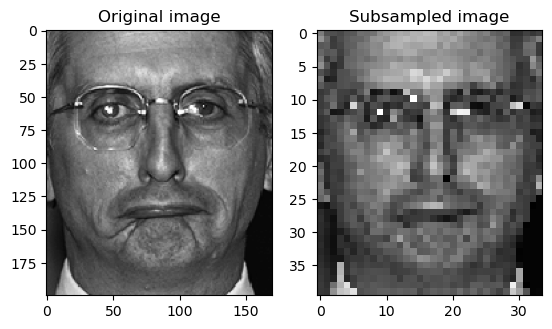

In [19]:
# Example of subsampling
im = faces[0]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(im[::5,::5], cmap=plt.cm.gray)
plt.title("Subsampled image")
plt.show()

This is Step 1 and 2 of PCA:

1)Subsamples the face images by a factor of 5 (taking every 5th pixel in both dimensions).

2)Flattens each image into a 1D vector.

3)Stacks all these vectors into a matrix T of shape (2963, 1360): 2963 = number of images. and 1360 = number of pixels in each subsampled image.

4)Computes the mean image across all samples.

5)Subtracts this mean from every row of T, so the data is centered at the origin.

6)You now have a matrix T of shape (n_images, n_pixels) that’s zero-centered.

->This will be used in the next step to compute the covariance matrix and perform eigen-decomposition.

Shape of T (subsampled faces): (2963, 1360)
Original image shape: (200, 170) → 34000 features
Subsampled image shape: (40, 34) → 1360 features
Mean image shape (vectorized): (1360,)


<Figure size 640x480 with 0 Axes>

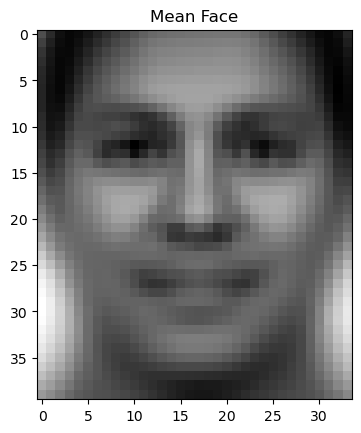

In [28]:
# Subsampling and vectorizing all face images
T = np.array([face[::5, ::5].flatten() for face in faces])  # shape: (n_samples, n_features)
print(f"Shape of T (subsampled faces): {T.shape}")  # e.g., (2963, 1360)

# Print original vs subsampled feature count
original_shape = faces[0].shape
original_features = original_shape[0] * original_shape[1]
subsampled_shape = (original_shape[0] // 5, original_shape[1] // 5)
subsampled_features = subsampled_shape[0] * subsampled_shape[1]

print(f"Original image shape: {original_shape} → {original_features} features")
print(f"Subsampled image shape: {subsampled_shape} → {subsampled_features} features")

# Set grayscale colormap
plt.gray()

# Compute the mean face
im_mean = T.mean(axis=0)
print(f"Mean image shape (vectorized): {im_mean.shape}")  # Should be (1360,)

# Center the data
T = T - im_mean

# Display the mean face
plt.figure()
plt.title("Mean Face")
plt.imshow(im_mean.reshape(subsampled_shape))  # reshape to (40, 34)
plt.show()

(1360, 1360)
(1360,) (1360, 1360)


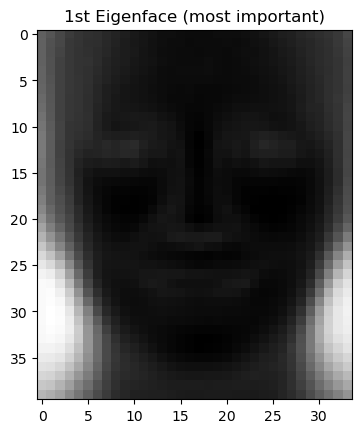

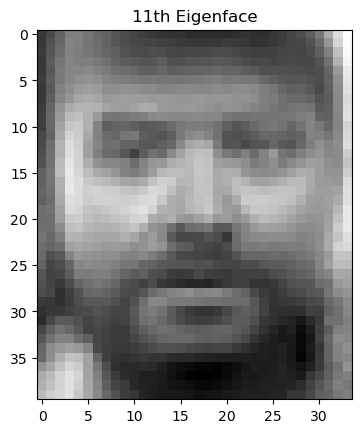

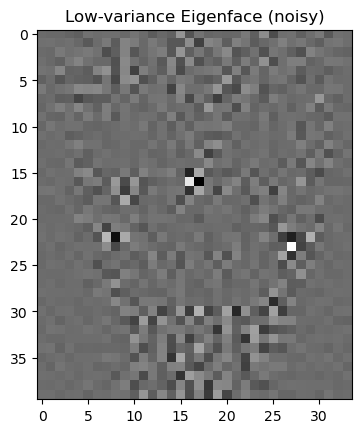

In [30]:
import numpy.linalg as LA

# Covariance matrix (or dot product): S = T.T @ T
S = np.dot(T.T, T)
print(S.shape)  # (1360, 1360)

# Eigenvalues and eigenvectors
w, v = LA.eig(S)
print(w.shape, v.shape)  # (1360,), (1360, 1360)

# Sort eigenvalues (and corresponding eigenvectors) in descending order
order = w.argsort()[::-1]
w = w[order]
v = v[:, order]

# Display the first eigenvector as an image (most variance), it corresponds to principal components
plt.figure()
plt.imshow(v[:, 0].reshape((40, 34)), cmap='gray')
plt.title("1st Eigenface (most important)")
plt.show()

# Display the 11th eigenvector as an image (still informative)
plt.figure()
plt.imshow(v[:, 10].reshape((40, 34)), cmap='gray')
plt.title("11th Eigenface")
plt.show()

# Display the 5th eigenvector from the end (least informative / noise)
plt.figure()
plt.imshow(v[:, -5].reshape((40, 34)), cmap='gray')
plt.title("Low-variance Eigenface (noisy)")
plt.show()


### Compression

1. Reconstruct images using only the first N eigenfaces (e.g. N=100).
2. Compare (visually) reconstructed images with original images

In [36]:
# Calcul de la variance expliquée pour chaque composante
explained_variance = w / w.sum()

# Trouver combien de composantes suffisent à expliquer > 90% de la variance
for i in range(len(explained_variance)):
    if explained_variance[:i].sum() > 0.9:
        print(i, explained_variance[:i].sum())
        break

# Pour > 95% de la variance
for i in range(len(explained_variance)):
    if explained_variance[:i].sum() > 0.95:
        print(i, explained_variance[:i].sum())
        break


109 0.9004433563654011
248 0.9502026266840311


### What Is Stored in the Compressed Version?

When we compress face images using PCA, we no longer need to store the full image (all pixels). Instead, we only store:

1. **The first _N_ eigenfaces**  
   → These are shared across all faces, like a new basis for describing faces.

2. **The _N_ coefficients for each face**  
   → These are the "coordinates" of the face in the eigenface space (how much of each eigenface is needed).

3. ** The **mean face**  
   → Needed to reconstruct the original image since we centered the data before applying PCA.

So instead of storing every pixel of every face, we just store:
- A small number of eigenfaces (shared),
- And a small number of values per face (compressed representation).

This leads to **massive compression** while still retaining most of the visual information — and it enables efficient comparison, reconstruction, and even classification.



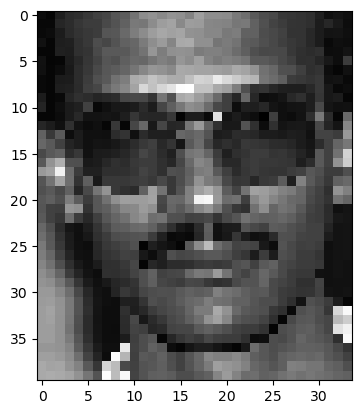

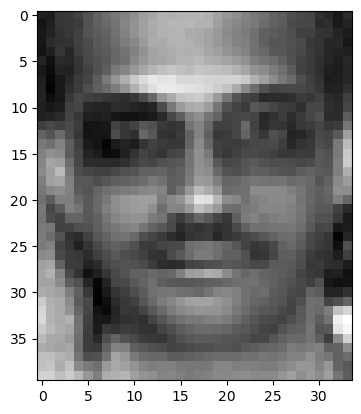

In [37]:
def encode(im, n):
    return np.dot(im, v[:, :n])

def decode(encoded, n):
    return np.dot(encoded, v[:, :n].T)

face = T[12]
N = 100  # Nombre de composantes principales utilisées, changer les valeurs, au plus c'est bas, au moins la reconstruction sera précise

encoded = encode(face, N)
decoded = decode(encoded, N)

# Affichage du visage original
plt.figure()
plt.imshow((face + im_mean).reshape((40, 34)), cmap='gray')

# Affichage de la reconstruction
plt.figure()
plt.imshow((decoded + im_mean).reshape((40, 34)), cmap='gray')
plt.show()


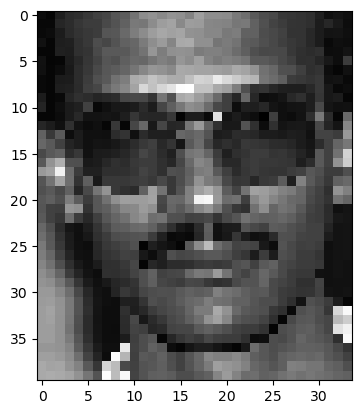

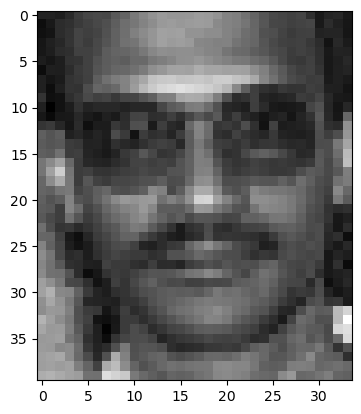

In [40]:
def encode(im, n):
    return np.dot(im, v[:, :n])

def decode(encoded, n):
    return np.dot(encoded, v[:, :n].T)

face = T[12]
N = 248  # Nombre de composantes principales utilisées, changer les valeurs, au plus c'est bas, au moins la reconstruction sera précise

encoded = encode(face, N)
decoded = decode(encoded, N)

# Affichage du visage original
plt.figure()
plt.imshow((face + im_mean).reshape((40, 34)), cmap='gray')

# Affichage de la reconstruction
plt.figure()
plt.imshow((decoded + im_mean).reshape((40, 34)), cmap='gray')
plt.show()

### Face recognition

1. Using the simplified vector space (e.g. 100 first eigenfaces), compute the euclidian distance between one face and the others.
2. For a subset of the image of the database, find the 4 closest matches.

In [42]:

# Nombre de composantes utilisées pour l'encodage
N = 250
T_weights = np.array([encode(face, N) for face in T])
print(T_weights.shape)  # (2963, 250)


(2963, 250)


Each face is now represented by a vector of 250 coefficients (weights for eigenfaces) instead of 1360 pixels

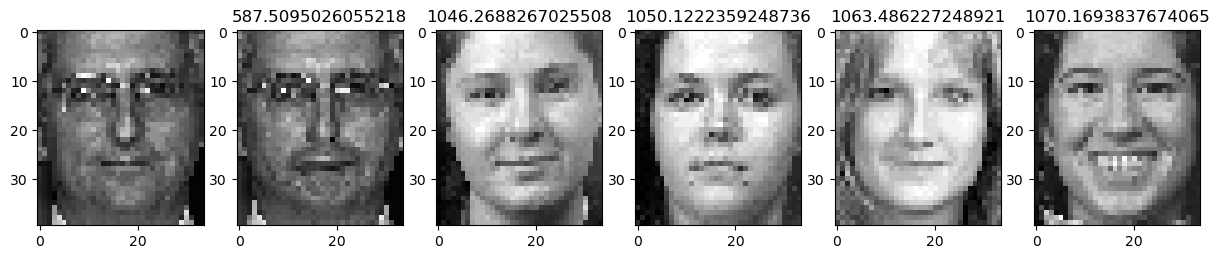

In [47]:
face_id = 1 ##esayer d'autres

# Calcul des distances euclidiennes dans l’espace des poids (T_weights)
distances = np.sqrt(((T_weights - T_weights[face_id]) ** 2).sum(axis=1))
distances[face_id] = distances.max()  # On ignore soi-même
best_matches = np.argsort(distances)  # On trie du plus proche au plus éloigné

# Affichage du visage cible + 4 plus proches correspondants
plt.figure(figsize=(15, 5))
plt.subplot(1, 6, 1)
plt.imshow((im_mean + T[face_id]).reshape((40, 34)), cmap='gray')

# Affiche les 4 visages les plus proches
for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow((im_mean + T[best_matches[i]]).reshape((40, 34)), cmap='gray')
    plt.title(distances[best_matches[i]])
plt.show()


In [ ]:
## NB : dataset assez simple, tête allignée, ... et on voit que ça marche assez bien. et ça match face avec les formes mais aussi lunettes, barbe, ...

In [ ]:
## NB : étape limitante c'est w, v = LA.eig(S) càd quand on compute eigein vector. Si S devient très grand, computationnal expensive
## Pour ça qu'on a subsamples images pour keep it small
